# Assignment A5: Segmentation I
---

In [ ]:
format compact

### Problem 1
Experiment with the various point, line, edge and thresholding techniques to segment
the moving objects in the frames of our video; extract the points in the object as well as
identify its boundary. Report on how these things were done, and the results in terms of the
following performance measures:
• Correctness: false positives and false negatives
• Size: error in the number of pixels associated with the moving object
• Shape: error in the boundary of the moving object.

In [ ]:
%%file CS6640_boundary.m

function [im_p, im_l, im_e] = CS6640_boundary(im_b, im_rgb)
% CS6640_boundary - Point, Line, and Edge boundary detection
% On input:
%     im_b (MxN array): binary segmentation image
%     im_rgb (MxNx3 array): original image
% On output:
%     im_p (MxN array): point detection image (binary)
%     im_l (MxN array): line detection image (binary)
%     im_e (MxN array): edge detection image (binary)
% Call:
%     [im_p, im_l, im_e] = CS6640_boundary(im_b, im_rgb)
% Author:
%     Cade Parkison
%     UU
%     Fall 2018
%



In [ ]:
im = CS6640_boundary(im_b, im_rgb)

----
#### Testing

In [ ]:
%plot native

In [ ]:
clear all;close all;clc

In [ ]:
video1 = VideoReader('video1.avi');
video1b = VideoReader('video1.avi');
video1c = VideoReader('video1.avi');
video2 = VideoReader('video2.avi');
video2b = VideoReader('video2.avi');
video2c = VideoReader('video2.avi');
video3 = VideoReader('video3.avi');
video3b = VideoReader('video3.avi');
video3c = VideoReader('video3.avi');

In [ ]:
video = video2;
video_b = video2b;
video_c = video2c;
M1 = CS6640_MM(video);

In [ ]:
%plot native

In [ ]:
frame_1 = 25;
im_bw_1 = M1(frame_1).cdata;
im_rgb_1 = read(video_b, frame_1);

In [ ]:
im_mask_1 = im_rgb_1;
im_mask_1(im_bw_1==0) = 0;
imshow(im_mask_1)

In [ ]:
frame_2 = 35;
im_bw_2 = M1(frame_2).cdata;
im_rgb_2 = read(video_b, frame_2);

In [ ]:
im_mask_2 = im_rgb_2;
im_mask_2(im_bw_2==0) = 0;
imshow(im_mask_2)

In [ ]:
frame_3 = 107;
im_bw_3 = M1(frame_3).cdata;
im_rgb_3 = read(video_b, frame_3);
size(im_bw_3)

In [ ]:
im_mask_3 = im_rgb_3;
im_mask_3(im_bw_3==0) = 0;
imshow(im_mask_3)

In [ ]:
im = CS6640_boundary(im_b, im_rgb)
imshow(im)

In [ ]:
[im_point_1, im_line_1, im_edge_1] = CS6640_boundary(im_b_1, im_rgb_1);


In [ ]:
%plot inline

In [ ]:
imshow(im_point_1)

In [ ]:
imshow(im_line_1)

In [ ]:
imshow(im_edge_1)

---

### Problem 2
Use the Hough transform to get an estimate of the linear parts of the track of the moving
objects. Report on how this was done, and give a qualitative analysis of the performance.

In [12]:
%plot native

In [1]:
clear all;close all;clc

video1 = VideoReader('video1.avi');
video1b = VideoReader('video1.avi');
video1c = VideoReader('video1.avi');
video2 = VideoReader('video2.avi');
video2b = VideoReader('video2.avi');
video2c = VideoReader('video2.avi');
video3 = VideoReader('video3.avi');
video3b = VideoReader('video3.avi');
video3c = VideoReader('video3.avi');

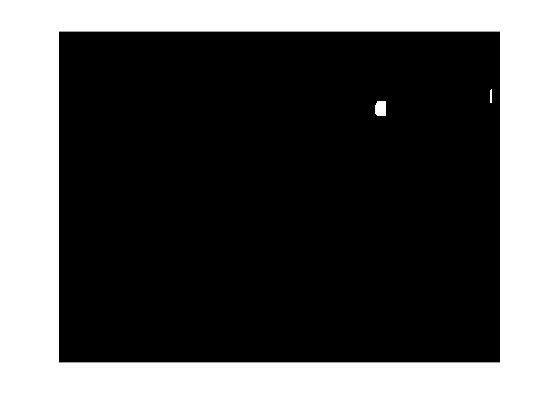

In [2]:
video = video3;
video_b = video3b;
video_c = video3c;
M1 = CS6640_MM(video);

In [3]:
object_data = CS6640_object_data(M1, video_c);

In [4]:
centroids = [];  % (Px2 Array) where P is the number of object centroids in object_data

frames = size(object_data);
n_frames = frames(2);

for f=1:n_frames
    objs = object_data(f);
    n_objects = objs.num_objects;
    for k=1:n_objects
        centroidX = objs.objects(k).col_mean;
        centroidY = objs.objects(k).row_mean;
        
        centroids = [centroids; [centroidX, centroidY]];
        
    end

end

In [5]:
BW = zeros(480,640); 
c_size = size(centroids);
n_centroids = c_size(1);

for i=1:n_centroids
    x = floor(centroids(i,1));
    y = floor(centroids(i,2));
    BW(y,x) = 255;
end

In [13]:
imshow(BW)

In [7]:
I = read(video_b, 50);
rotI = imrotate(I,33,'crop');

In [8]:
[H,T,R] = hough(BW);

In [33]:
figure(2);
imshow(H,[],'XData',T,'YData',R,...
            'InitialMagnification','fit');
xlabel('\theta'), ylabel('\rho');
axis on, axis normal, hold on;

In [34]:
P  = houghpeaks(H,5,'threshold',ceil(0.3*max(H(:))));
x = T(P(:,2)); y = R(P(:,1));
plot(x,y,'s','color','white');

In [35]:
lines = houghlines(BW,T,R,P,'FillGap',60,'MinLength', 0.01);
figure, imshow(I), hold on
max_len = 0;
for k = 1:length(lines)
   xy = [lines(k).point1; lines(k).point2];
   plot(xy(:,1),xy(:,2),'LineWidth',2,'Color','green');

   % Plot beginnings and ends of lines
   plot(xy(1,1),xy(1,2),'x','LineWidth',2,'Color','yellow');
   plot(xy(2,1),xy(2,2),'x','LineWidth',2,'Color','red');

   % Determine the endpoints of the longest line segment
   len = norm(lines(k).point1 - lines(k).point2);
   if ( len > max_len)
      max_len = len;
      xy_long = xy;
   end
end

In [ ]:
size(centroids)

In [ ]:
bw = zeros(480,640); size(bw)

In [ ]:
x = floor(centroids(1,1))
y = floor(centroids(1,2))

In [ ]:
bw(x,y)

---

### Problem 3
Implement the simple graph cut method described in class. Determine what type of
preprocessing is necessary in order to effectively apply the method to moving object segmentation
in our videos. Discuss the issues discovered and qualitatively describe the performance.
Implement the Matlab funcion CS6640 GC.


In [ ]:
%%file CS6640_GC.m

function [C,V] = CS6640_GC(im)
% CS6640_GC - Graph Cut segmentation
% On input:
%     im (MxN array): input image
% On output:
%     C (MxN array): binary classification
%     V (M*Nx6 array): eigenvectors of similarity matrix
% Call:
%     [C,V] = CS6640_GC(im);
% Author:
%     Cade Parkison
%     UU
%     Fall 2018
%



---
#### Testing

In [39]:
%plot inline

In [36]:
clear all;close all;clc

video1 = VideoReader('video1.avi');
video1b = VideoReader('video1.avi');
video1c = VideoReader('video1.avi');
video2 = VideoReader('video2.avi');
video2b = VideoReader('video2.avi');
video2c = VideoReader('video2.avi');
video3 = VideoReader('video3.avi');
video3b = VideoReader('video3.avi');
video3c = VideoReader('video3.avi');

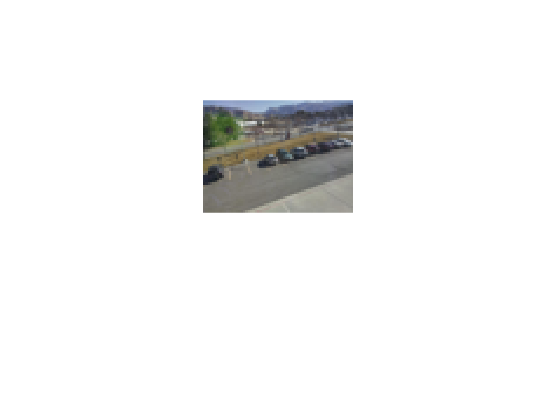

In [67]:
im1 = read(video2, 35);
im2 = imresize(im1, 0.75);
im3 = imresize(im1, 0.5);
im4 = imresize(im1, 0.25);
im5 = imresize(im1, 0.1);
imshow(im5)

In [119]:
im_gray = rgb2gray(im4);

[M,N] = size(im_gray);
im_vect = im_gray(:);

In [120]:
sim = zeros(length(im_vect), length(im_vect));
for i=1:length(im_vect)
    for j=1:length(im_vect)
        sim(i,j) = exp(-abs(double(im_vect(i))-double(im_vect(j))));
        
    end
end

In [121]:
[V,D] = eigs(sim);
e1 = V(:,1);

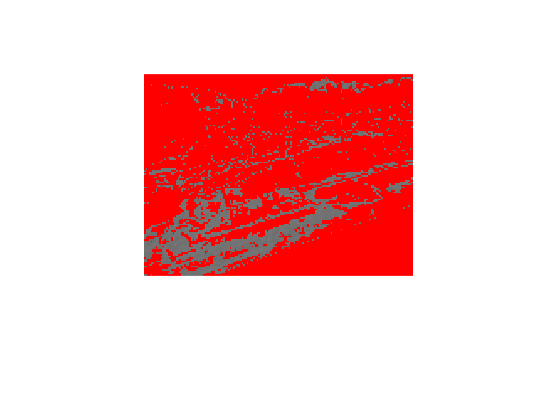

In [122]:
[cidx, ctrs] = kmeans(e1, 2);
combo(mat2gray(im_gray), (reshape(cidx==1,M,N)));

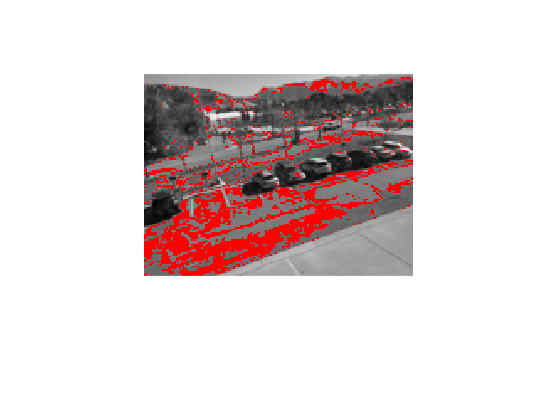

In [123]:
combo(mat2gray(im_gray), (reshape(cidx==2,M,N)));

---

### Problem 4
Implement the simple watershed algorithm described in class. Determine what type
of preprocessing is necessary in order to effectively apply the method to moving object
segmentation in our videos. Discuss the issues discovered and qualitatively describe the
performance. Implement the Matlab funcion CS6640 WS.

In [ ]:
%%file CS6640_WS.m

function WS = CS6640_WS(im)
% CS6640_WS - watershed (returns largest spread region)
% On input:
%     im (MxN array): input image
% On output:
%     WS (MxN array): labeled watershed regions
% Call:
%     WS = CS6640_WS(im);
% Author:
%     Cade Parkison
%     UU
%     Fall 2018
%
